# Comparative Analysis of Literacy Assessments Scores of Native- and Foreign-born children using PIRLS 2021 Data

## Introduction

In the below analysis I use data sourced from IEA’s Progress in International Reading Literacy Study 2021 (PIRLS 2021) to assess literacy assessment scores for native and foreign-born children across nine countries with significant refugee populations. 

## Limitation

Some variables, particularly those derived from context questionnaires (e.g., feelings or experiences in school), rely on self-reported data, which may introduce biases or inaccuracies.

### About PIRLS

PIRLS is an international assessment of reading for fourth graders conducted every five years, starting in 2001. In total, almost 400,000 children were assessed in the 2021 cohort, across 57 countries. As well as reading assessments, the PIRLS data also contains answers to context questionnaires conducted with students, parents, teachers and schools, providing invaluable insight into the reality of learning environments.

For more information on PIRLS, please see [here.](https://www.iea.nl/studies/iea/pirls)

SOURCE: IEA’s Progress in International Reading Literacy Study – PIRLS 2021 Copyright © 2023 International Association for the Evaluation of Educational Achievement (IEA). Publisher: TIMSS & PIRLS International Study Center, Lynch School of Education and Human Development, Boston College.

### Data Compiling, Cleaning and Filtering

Data for this analysis was downloaded [here](https://pirls2021.org/data/) as separate SPSS files for questionnaire type and country. 

After a brief analysis of what each data source provided, I chose files to use, converted them to excel files and concatenated them into one dataset. I then cleaned and filtered this new dataset. 
 
To view these processes, please <a href="https://github.com/SophieESpencer/Comparison/tree/main/Final%20Notebooks">click here</a>.
 

## Importing the data and relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('cleandataiqr17125.xlsx', index_col=0)

## Organising and Understanding Columns

During the cleaning process, I used these groupings of columns to help understand the data:

In [112]:
main_variables = ['Country','ASBH02A']
demographic_info_columns = ['ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
feelings_in_school_columns = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
experiences_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

As we can see above, the columns may be divided into:
- The main independent variables for this analysis (Country and birth status)
- Demographic information columns which have mainly been taken from the Home Context Survey data (answered by parents)
- Columns relating to children's feelings in school (self-reported)
- Experience in school columns which relate to the frequency of negative experience in school (self-reported)
- Assessment score columns (test scores)

# Literacy Test Scores

In this analysis I will be looking predominantly at the assessment score columns. The first thing I want to investigate is how literacy scores differ for foreign and native-born children across countries. 

## Average Score Leaderboard

First of all, I want to use the 'avgscore' column which was generated in the cleaning stage, to gain an idea of how country averages compare. Please note, I used interquartile range filtering to filter the data in the previous stage so I am quite confident in the validity of this data.

In [10]:
# Create a pivot table of country averages and sort highest to lowest
df_avg_pivot = df.pivot_table(values='avgscore', index='Country').sort_values(by='avgscore', ascending=False)

<Figure size 864x432 with 0 Axes>

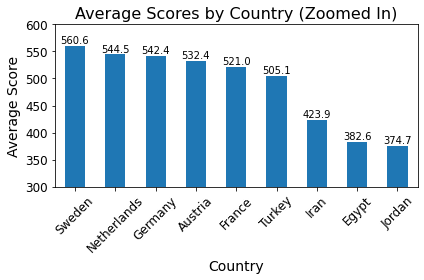

In [5]:
# Create a large figure
plt.figure(figsize=(12, 6))

# Plot the sorted bar chart with unique colors
ax = df_avg_pivot.plot(kind='bar', legend=False)

# Customizing the plot
plt.title('Average Scores by Country (Zoomed In)', fontsize=16)
plt.ylabel('Average Score', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Set y-axis limits to zoom in between 300 and 600
plt.ylim(300, 600)

# Annotate each bar with its value
for i, value in enumerate(df_avg_pivot['avgscore']):
    plt.text(i, value + 5, f'{value:.1f}', ha='center', fontsize=10, color='black')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Observations

- As we can see above, Swedish students are achieving on average the highest scores, with Jordan achieving the lowest.  

- Sweden is closely followed by Netherlands, Germany, Austria. France and Turkey in that order, all with average scores above 500. Turkey is followed by Iran with an average score of 423.9 and then Egypt and Jordan with average scores of 382.6 and 374.7 respectively. 

-  I would expect Sweden, Netherlands, Germany, Austria and France to have higher achieving students than the other countries as these are Western European countries with high GDPs. 

**Middle Income Countries**
- Turkey and Jordan are upper-middle income countries. Iran and Egypt are lower-middle income countries. 

- It is surprising that Turkey performs significantly better than the others. Is it a middle-income country. 

- It is also telling that Egypt outperforms Jordan despite Jordan having a higher GDP and being considered a upper-middle income country. 

### Comparison with benchmarks

In [22]:
df['avgscore'].describe()

count    41158.000000
mean       466.971053
std        109.754016
min        160.574553
25%        395.985095
50%        483.052609
75%        550.627011
max        757.011431
Name: avgscore, dtype: float64

Now I want to investigate whether there is a disparity in assessment scores between native- and foreign-born children in these countries. 

## Comparing Assessment Scores of Native- and Foreign-Born Children

In [41]:
pivot_foreign = df[df['ASBH02A'] == 'foreign_born'].pivot_table(values='avgscore',index='Country').sort_values(by='avgscore',ascending=False).reset_index()

In [43]:
pivot_native = df[df["ASBH02A"]=='native_born'].pivot_table(values='avgscore',index='Country').sort_values(by='avgscore',ascending=False).reset_index()

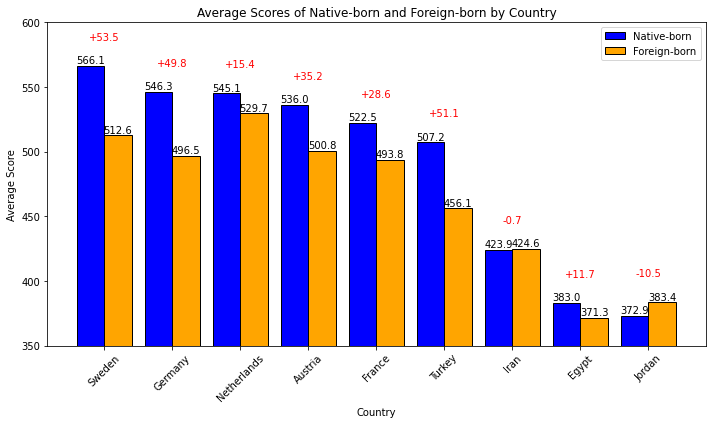

In [74]:
# Ensure native and foreign-born data are aligned by country
merged = pd.merge(
    pivot_native[['Country', 'avgscore']], 
    pivot_foreign[['Country', 'avgscore']], 
    on='Country', 
    suffixes=('_native', '_foreign')
)

# Extract aligned data
countries = merged['Country']
native_scores = merged['avgscore_native']
foreign_scores = merged['avgscore_foreign']

# Calculate differences
differences = native_scores - foreign_scores

# Plotting
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.4

# Positions of bars
x = np.arange(len(countries))

# Set y-axis limits to zoom in between 350 and 600
plt.ylim(350, 600)

# Plot native-born (fully opaque)
plt.bar(
    x - bar_width / 2,
    native_scores,
    width=bar_width,
    alpha=1,
    color="blue",
    edgecolor="black",
    label="Native-born",
)

# Plot foreign-born (fully opaque)
plt.bar(
    x + bar_width / 2,
    foreign_scores,
    width=bar_width,
    alpha=1,
    color="orange",
    edgecolor="black",
    label="Foreign-born",
)

# Annotate with differences and bar heights
for i, (native, foreign, diff) in enumerate(zip(native_scores, foreign_scores, differences)):
    # Position annotation dynamically above the taller bar for the difference
    taller_y = max(native, foreign)
    plt.text(
        x[i],
        taller_y +20,  # Slightly above the taller bar
        f"{diff:+.1f}",  # Difference with a sign
        ha="center",
        fontsize=10,
        color="red",
    )

    # Annotate native-born bar height
    plt.text(
        x[i] - bar_width / 2,
        native + 2,  # Slightly above the native bar
        f"{native:.1f}",
        ha="center",
        fontsize=10,
        color="black",
    )

    # Annotate foreign-born bar height
    plt.text(
        x[i] + bar_width / 2,
        foreign + 2,  # Slightly above the foreign bar
        f"{foreign:.1f}",
        ha="center",
        fontsize=10,
        color="black",
    )

# Adding labels and legend
plt.xticks(x, countries, rotation=45)
plt.xlabel("Country")
plt.ylabel("Average Score")
plt.title("Average Scores of Native-born and Foreign-born by Country")
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


### Observations

From this visualisation we can see that:

#### Leaderboard for Foreign-born Children

- Despite Sweden being on top of the leadersboard for average scores of all children, in terms of scores for foreign-born students, Netherlands takes first place, with a 17.1 lead on foreign-born children in Sweden. 

- Likewise, despite Germany being in second place with overall scores, it is in fourth place for foreign-born children, behind Austria in third place. 

- Although Sweden and Germany are besting the Netherlands and Austria respectively in terms of overall literacy scores, the Netherlands and Austria are outperforming these particular rivals in terms of foreign-born children's results.

- Another difference is at the other end of the leaderboard where foreign-born Jordanian students are in eighth place and those in Egypt are in ninth place, despite these countries being in the reverse positions in terms of average overall scores.  

#### Native vs Foreign

- Native born children outperform their foreign born peers in every country apart from Iran and Jordan. 

- Sweden, Turkey, and Germany have the largest disparity in scores between native and foreign-born students, with native-born students in these countries achieving 53.5, 51.1 and 49.8 marks higher than foreign-born peers. 

- The Netherlands has the smallest disparity between native and foreign-born children in a high-income country, with an average difference of 15.4 marks. 

- Iran has the smallest disparity in marks between Foreign- and native- born children with foreign-born children actually achieving marks 0.7 higher than their native-born peers. 

- Apart from Turkey, with a large disparity between students, on average middle_income countries show smaller disparities. This may also be die to foreign-born students in Iran, Egypt and Jordan sharing a mother tongue with their native-born peers. 

- Jordan is an interesting case, where foreign children are achieving 10.5 marks higher than native-born peers. As Jordan hosts both Syrian and Palestinian refugees, it might be that most Syrian children are considered foreign-born and Palestinian are considered native-born? 

#### Summary

The Netherlands seems to be leading the way in terms of achieving high scores for foreign-born students, achieving even better scores than some native-born children in other high income countries. It would therefore be very useful to understand what techniques are being used in Dutch schools to achieve these results. 

This stage has thrown up some interesting results particularly in lower income host countries. In the next stages, I will investigate how age of arrival affects results for foreign-born children.

## Literacy Minimum Age of Arrival

In [23]:
pivot_minage_literacy = df.pivot_table(values='avgscore', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [107]:
# Reindex the DataFrame based on the custom order
pivot_minage_literacy = pivot_minage_literacy.reindex(country_order)

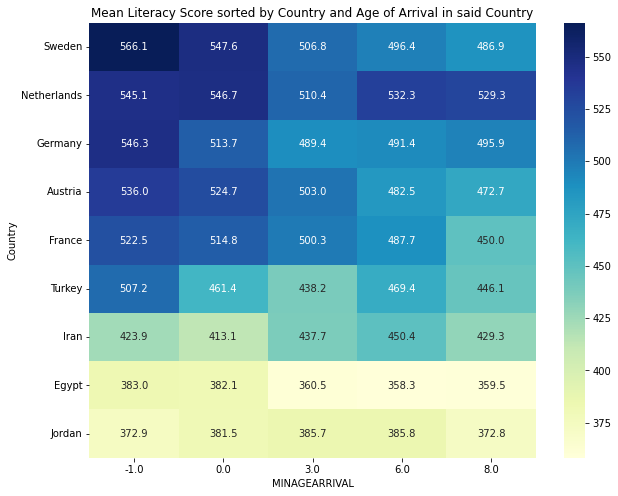

In [109]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_minage_literacy, annot=True,fmt=".1f", cmap='YlGnBu')
plt.title('Mean Literacy Score sorted by Country and Age of Arrival in said Country')
plt.show()

### maybe do a max and min column above?

### Observations

**Age of Arrival effect on scores**

We would expect the older you arrive, the more difficult it would be to assimilate as the less likely you are to speak the language and your parents to speak the language. 

This hypothesis only holds in Sweden, Austria, France, where we see a gradual decrease in attainment the older the children arrive in country, with native students doing the best. 

In Netherlands, Germany, and Turkey, children who arrived between the ages of 3 and 6 perform the worst overall. As these children were 10 in 2021 they would have arrived between 2014 and 2017 and this is perhaps reflecting these countries' struggle to accomodate an influx of foreign-born children at this time?

**Netherlands**
As we saw in the previous visualisation, Netherlands appears to be doing something right with foreign-born children. 

- Foreign-born children arriving under the age of 3 in the Netherlands are out-performing all their peers, including native-born peers by a small amount. 

- Children arriving after the age of 8 in the Netherlands are performing very well, even performing better than native born children in France, Turkey, Iran, Jordan and Egypt. 

**Summary**

The Netherlands is out performing all othre countries. There is a need to corroborate this data with the age data to understand the actual year that children arrived as they may have been held back in school (they may not all be ten years old). We should remember that the sample sizes for non-native children may be quite small. I will look at this in the next stage.

#### Do the below as a heatmap but with counts
#### Corroborate above data with age data

In [110]:
for country in country_order: 
    filtered_df = df[df['Country'] == country]
    print(f"Value counts for {country}:")
    print(filtered_df["MINAGEARRIVAL"].value_counts())

Value counts for Sweden:
-1.0    2681
 3.0     108
 0.0      82
 6.0      74
 8.0      39
Name: MINAGEARRIVAL, dtype: int64
Value counts for Netherlands:
-1.0    1947
 0.0      26
 6.0      18
 3.0      16
 8.0      11
Name: MINAGEARRIVAL, dtype: int64
Value counts for Germany:
-1.0    2317
 3.0      75
 0.0      53
 6.0      36
 8.0      32
Name: MINAGEARRIVAL, dtype: int64
Value counts for Austria:
-1.0    4025
 3.0     175
 0.0     123
 6.0      91
 8.0      59
Name: MINAGEARRIVAL, dtype: int64
Value counts for France:
-1.0    4526
 0.0      81
 3.0      71
 6.0      49
 8.0      25
Name: MINAGEARRIVAL, dtype: int64
Value counts for Turkey:
-1.0    5366
 0.0      89
 3.0      70
 6.0      53
 8.0      15
Name: MINAGEARRIVAL, dtype: int64
Value counts for Iran:
-1.0    5689
 0.0      40
 6.0      19
 8.0      16
 3.0      15
Name: MINAGEARRIVAL, dtype: int64
Value counts for Egypt:
-1.0    6992
 0.0     113
 3.0      42
 6.0      39
 8.0      25
Name: MINAGEARRIVAL, dtype: int64
Valu

Given the above small sample sizes a further investigation into these students and whether they all come from the same school, would be useful. (only 11 after age 8 in the netherlands.) would be interesting to get as much info as poss on these kids. 

## Areas of Assessment

As there are 25 literacy assessment score columns, for visualisation purposes I will create 5 subgroups which represent the different areas of assessment in the original data. These are reading, literary purpose, informational purpose, interpreting process and straightforward process.

In [11]:
reading = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05'] 
literary_purpose = ['ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05']
informational_purpose=['ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05']
interpreting_process= ['ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05']
straightforward_process = ['ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

First I will create average scores for each area of literacy assessed.

In [12]:
# Define the function
def calculate_average(df, columns, new_column_name):
    """
    Calculates the mean of the specified columns and adds a new column with the result.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): The list of column names to calculate the mean.
    new_column_name (str): The name of the new column to store the averages.
    
    Returns:
    pd.DataFrame: The DataFrame with the new column added.
    """
    df[new_column_name] = df[columns].mean(axis=1)
    return df

In [13]:
# Calculate the mean of the reading columns
df = calculate_average(df, reading, 'reading_avg')
df = calculate_average(df, literary_purpose, 'literary_purpose_avg')
df = calculate_average(df, informational_purpose, 'informational_purpose_avg')
df = calculate_average(df, interpreting_process, 'interpreting_process_avg')
df = calculate_average(df, straightforward_process, 'straightforward_process_avg')

In [87]:
averages = ['reading_avg', 'literary_purpose_avg', 'informational_purpose_avg',
       'interpreting_process_avg', 'straightforward_process_avg']

### Literacy Scores Heat Map

In [88]:
df_literacy = df[main_variables+averages]

I will then create a pivot table of this dataframe with 'Country' and 'ASBH02A' as index columns.

In [89]:
pivot_literacy = df_literacy.pivot_table(values=averages, index=main_variables, aggfunc='mean')

I now want to sort the pivot table by country average and immigration status so that countries with higher scores are at the top and for each country, the row for native-born children sits above the row for foreign-born children. 

In [90]:
pivot_literacy

informational_purpose_avg  interpreting_process_avg  \
Country     ASBH02A                                                             
Austria     foreign_born                 498.657408                497.365857   
            native_born                  533.604588                533.534905   
Egypt       foreign_born                 370.511240                377.988919   
            native_born                  388.026293                385.158702   
France      foreign_born                 491.164422                492.907004   
            native_born                  520.421201                518.050071   
Germany     foreign_born                 493.821976                491.637327   
            native_born                  543.667811                543.658520   
Iran        foreign_born                 415.629239                418.139679   
            native_born                  423.360013                422.085360   
Jordan      foreign_born                 385.640608                378.628537   
            native_born                  376.602329                371.209104   
Netherlands foreign_born                 534.779113                527.015559   
            native_born                  546.509569                545.771857   
Sweden      foreign_born                 513.800935                509.636203   
            native_born                  564.668847                563.305228   
Turkey      foreign_born                 459.545292                450.463128   
            native_born                  508.299876                504.960550   

                          literary_purpose_avg  reading_avg  \
Country     ASBH02A                                           
Austria     foreign_born            503.520940   501.137730   
            native_born             538.353546   535.753998   
Egypt       foreign_born            371.339085   370.347787   
            native_born             376.962961   383.667032   
France      foreign_born            494.816631   495.189771   
            native_born             524.127303   522.368422   
Germany     foreign_born            503.782080   496.504230   
            native_born             551.219226   545.941246   
Iran        foreign_born            435.488964   424.286114   
            native_born             424.545296   424.466109   
Jordan      foreign_born            382.770142   384.284535   
            native_born             370.215285   373.179919   
Netherlands foreign_born            527.257465   532.012580   
            native_born             544.596141   544.055471   
Sweden      foreign_born            510.426070   513.532231   
            native_born             569.014791   565.399209   
Turkey      foreign_born            456.161154   454.834990   
            native_born             505.637007   507.160195   

                          straightforward_process_avg  
Country     ASBH02A                                    
Austria     foreign_born                   503.331516  
            native_born                    538.541325  
Egypt       foreign_born                   366.415503  
            native_born                    381.290921  
France      foreign_born                   495.147998  
            native_born                    527.467670  
Germany     foreign_born                   496.581183  
            native_born                    546.973033  
Iran        foreign_born                   429.671741  
            native_born                    425.031725  
Jordan      foreign_born                   385.779141  
            native_born                    373.363566  
Netherlands foreign_born                   527.323949  
            native_born                    544.427139  
Sweden      foreign_born                   515.623797  
            native_born                    568.000974  
Turkey      foreign_born                   459.409544  
            native_born                    509.904656

In [91]:
# Define a custom order for the 'ASBH02A' column
asbh02a_sorter = ['native_born','foreign_born']

In [92]:
country_order = df_avg_pivot.reset_index()["Country"].to_list()

In [93]:
country_order

['Sweden',
 'Netherlands',
 'Germany',
 'Austria',
 'France',
 'Turkey',
 'Iran',
 'Egypt',
 'Jordan']

In [99]:
sorted_index = (
    pivot_literacy.index.to_frame()
    .rename(columns={'Country': 'Country_', 'ASBH02A': 'ASBH02A_'})
    .assign(
        Country_=lambda df: pd.Categorical(df['Country_'], categories=country_order, ordered=True),
        ASBH02A_=lambda df: pd.Categorical(df['ASBH02A_'], categories=asbh02a_sorter, ordered=True)
    )
    .sort_values(by=['Country_', 'ASBH02A_'])
    .index
)

In [100]:
sorted_pivot_literacy = pivot_literacy.loc[sorted_index]

Now I will plot the sorted pivot table as a heatmap for readability. 

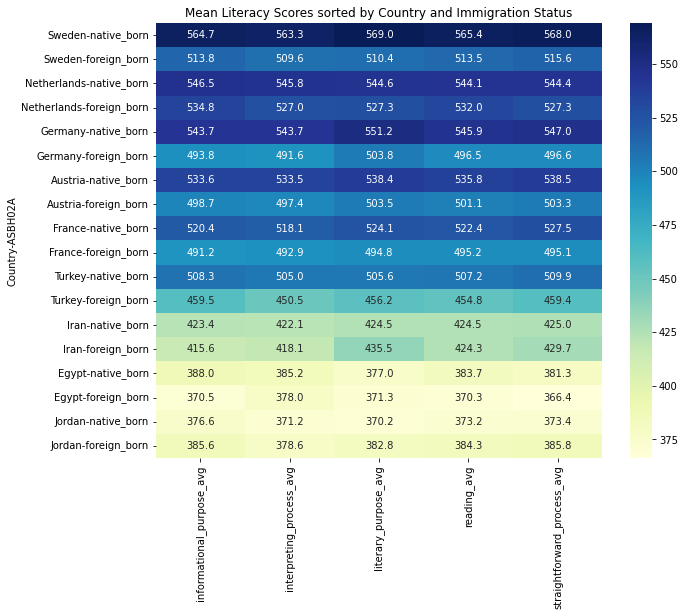

In [102]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_literacy, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Mean Literacy Scores sorted by Country and Immigration Status')
plt.show()

### Observations

#### Areas of Assessment

- Scores seem to be slightly higher for literacy- purpose questions. 

## Literacy Average Distribution

Now I want to see with a heatmap how being born in the respective country affects the distribution of average literacy scores across different countries. To ensure readability of this visualisation I will examine only the mean assessment score.

In [ ]:
# Divide the column into ten bins for readability
df['literacyavg_binned'] = pd.cut(df['avgscore'], bins=10)

In [ ]:
# Create a contingency table
contingency_literacy = (
    pd.crosstab(
        index=[df['ASBH02A'], df['Country']],
        columns=df['literacyavg_binned']
    )
    .reset_index()
    .melt(
        id_vars=['ASBH02A', 'Country'],
        var_name='literacyavg_binned',
        value_name='count'
    )
)

Now I will create a set of functions that can be used across our different areas of exxamination (literacy scores, feelings in school and experiences in school) that will:
- divide the data into native and foreign born students
- create separate pivot tables for these two new datasets
- generate a pivot table with percentage values
- format the data for plotting
- plot a heatmap representing the data 

In [ ]:
def filter_and_prepare_data(data, filter_column, filter_value, drop_column=None):
    """
    Filters the data based on a column value and optionally drops a column.
    
    Parameters:
    - data: pd.DataFrame, the input data.
    - filter_column: str, the column to filter on.
    - filter_value: str, the value to filter by.
    - drop_column: str, optional, a column to drop after filtering.
    
    Returns:
    - pd.DataFrame, the filtered and optionally cleaned data.
    """
    filtered_data = data[data[filter_column] == filter_value]
    if drop_column and drop_column in filtered_data.columns:
        filtered_data = filtered_data.drop(drop_column, axis=1)
    return filtered_data

In [ ]:
def create_pivot_table(data, index_col, column_col, value_col):
    """
    Creates a pivot table from the filtered data.
    
    Parameters:
    - data: pd.DataFrame, the input data.
    - index_col: str, column for the pivot index.
    - column_col: str, column for the pivot columns.
    - value_col: str, column for the pivot values.
    
    Returns:
    - pd.DataFrame, the pivot table.
    """
    return data.pivot(index=index_col, columns=column_col, values=value_col)

In [ ]:
def normalize_to_percentages(pivot_table):
    """
    Normalizes pivot table values to percentages.
    
    Parameters:
    - pivot_table: pd.DataFrame, the input pivot table with a "total" column.
    
    Returns:
    - pd.DataFrame, the pivot table normalized to percentages.
    """
    pivot_table["total"] = pivot_table.sum(axis=1)
    total_column = pivot_table["total"]
    normalized_table = pivot_table.div(total_column, axis=0) * 100
    return normalized_table.drop("total", axis=1)

In [ ]:
def melt_and_format_data(pivot_table, id_col, melt_col, value_name):
    """
    Converts a pivot table to a melted format and formats categorical bins.
    
    Parameters:
    - pivot_table: pd.DataFrame, the input pivot table.
    - id_col: str, column to use as the identifier in the melted table.
    - melt_col: str, the column to melt (e.g., a column from the pivot table).
    - value_name: str, name for the values in the melted table.
    - bin_order: list of str, ordered categories for the bins.
    
    Returns:
    - pd.DataFrame, the melted and formatted data.
    """
    melted = pivot_table.reset_index().melt(id_vars=id_col, var_name=melt_col, value_name=value_name)
    return melted


In [ ]:
def generate_heatmap(data, filter_column, filter_value, index_col, column_col, value_col):
    """
    Generates a heatmap from the data based on filtering, pivoting, and normalizing steps.
    
    Parameters:
    - data: pd.DataFrame, the input data.
    - filter_column: str, column to filter on.
    - filter_value: str, value to filter by.
    - index_col: str, column for the pivot index.
    - column_col: str, column for the pivot columns.
    - value_col: str, column for the pivot values.
    - bin_order: list of str, ordered categories for the bins.
    
    Returns:
    - pd.DataFrame, the final heatmap as a pivot table.
    """
    filtered_data = filter_and_prepare_data(data, filter_column, filter_value, drop_column=filter_column)
    pivot_table = create_pivot_table(filtered_data, index_col=index_col, column_col=column_col, value_col=value_col)
    normalized_table = normalize_to_percentages(pivot_table)
    melted_data = melt_and_format_data(
        normalized_table, id_col=index_col, melt_col=column_col, value_name="percentage"
    )
    heatmap = melted_data.pivot(index=column_col, columns=index_col, values="percentage")
    return heatmap


Using the functions defined above I will now plot a figure with two heatmaps side by side representing the distribution of literacy assessment scores for native born and foreign born children respectively. 

In [ ]:
heatmap_literacy_native_born = generate_heatmap(
    data=contingency_literacy,
    filter_column='ASBH02A',
    filter_value='native_born',
    index_col='Country',
    column_col='literacyavg_binned',
    value_col='count',
)

heatmap_literacy_foreign_born = generate_heatmap(
    data=contingency_literacy,
    filter_column='ASBH02A',
    filter_value='foreign_born',
    index_col='Country',
    column_col='literacyavg_binned',
    value_col='count',
)

In [ ]:
# Create a figure and set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmaps
sns.heatmap(heatmap_literacy_native_born, ax=axes[0], cmap='YlOrRd', annot=True, cbar=False)
sns.heatmap(heatmap_literacy_foreign_born, ax=axes[1], cmap='YlOrRd', annot= True, cbar=False)

# Set titles
axes[0].set_title('Born in country')
axes[1].set_title('Not born in country')

# Show the plot
plt.tight_layout()
plt.show()

In order to better understand the difference between the two heat maps above, I will plot a heatmap showing the difference below.

In [ ]:
diff_data_literacy = heatmap_literacy_native_born - heatmap_literacy_foreign_born

# Plot the difference heatmap
sns.heatmap(diff_data_literacy, cmap="coolwarm", annot = True, center=0)

### Observations

The above heatmap shows in red where native born countries hold a larger percentage of values compared to their foreign-born peers. For example, in Germany, there is a difference of 16% in the number of children achieving an average score between 578.08 and 637.734 -one of the higher scoring brackets.


Conversely, there are 7% less native-born students achieving a lower score between 279.862,and 339.506 than foreign born students in Turkey.


Interestingly, in Jordan and Iran - countries that are host many refugees with the same native language as the host country -there is less pronounced disparity between the scores received by foreign and native-born children. Indeed, in Iran and Turkey the proportion of native born children achieving lower literacy score brackets is higher, though the differences are relatively small.  

Now I will perform the same analyses and visualisations to assess children's feelings about school and their experiences within it.

# Feelings in School

### Feelings in School Columns

The feelings in school columns all begin with the prefix 'ASBG10' followed by:

What do you think about your school? Tell how much you agree with
these statements. 


A: I like being in school\
B: I feel safe when I am at school\
C: I feel like I belong at this school\
D: Teachers at my school are fair to me\
E: I am proud to go to this school\
F: I have friends at this school\

1 = Agree a lot\
2 = Agree a little\
3 = Disagree a little\
4 = Disagree a lot

## Feelings Heat Map

In [113]:
df_feelings = df[main_variables+feelings_in_school_columns]

In [114]:
pivot_feelings = df_feelings.pivot_table(values=feelings_in_school_columns, index=main_variables, aggfunc='mean')

In [115]:
# Calculate the total average for each row
pivot_feelings['MeanTotal'] = pivot_feelings[feelings_in_school_columns].mean(axis=1)

In [116]:
def sort_pivot_table(pivot_table, mean_col, sorter_col, sorter_order):
    """
    Sorts a pivot table based on the mean of a specified column and a custom order for another column.

    Parameters:
    - pivot_table (pd.DataFrame): The pivot table to sort.
    - mean_col (str): Column to calculate the mean for sorting countries.
    - sorter_col (str): Column to apply the custom sorting order.
    - sorter_order (list): Custom order for the sorter_col.

    Returns:
    - pd.DataFrame: A sorted pivot table.
    """
    # Sort countries by the total average of mean_col
    country_averages = (
        pivot_table.groupby('Country')[mean_col]
        .mean()
        .sort_values(ascending=True)
        .index.tolist()
    )

    # Create a custom sorting order for the index
    sorted_index = (
        pivot_table.index.to_frame()
        .rename(columns={'Country': 'Country_', sorter_col: f'{sorter_col}_'})
        .assign(
            Country_=lambda df: pd.Categorical(df['Country_'], categories=country_averages, ordered=True),
            **{f'{sorter_col}_': lambda df: pd.Categorical(df[f'{sorter_col}_'], categories=sorter_order, ordered=True)}
        )
        .sort_values(by=['Country_', f'{sorter_col}_'])
        .index
    )

    # Apply the sorted index to the pivot table
    return pivot_table.loc[sorted_index]


In [117]:
sorted_pivot_feelings = sort_pivot_table(pivot_feelings, 'MeanTotal', 'ASBH02A', asbh02a_sorter)

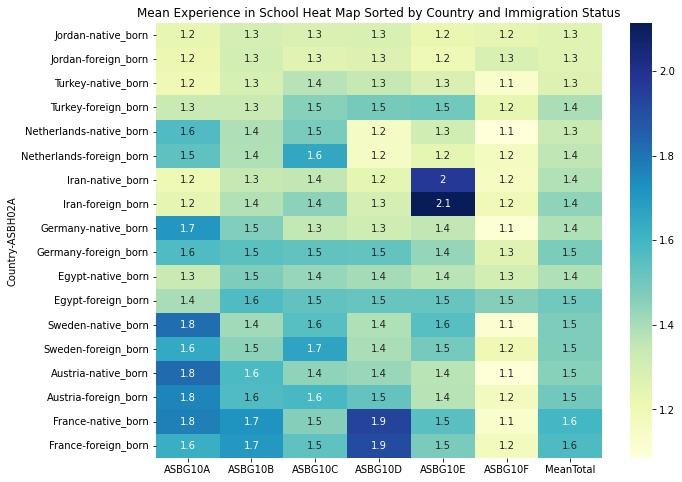

In [118]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_feelings, annot=True, cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

**Feelings**
1. Jordan
2. Turkey
3. Netherlands
4. Iran
5. Germany
6. Egypt
7. Sweden
8. Austria
9. France

What do you think about your school? Tell how much you agree with
these statements. 


A: I like being in school\
B: I feel safe when I am at school\
C: I feel like I belong at this school\
D: Teachers at my school are fair to me\
E: I am proud to go to this school\
F: I have friends at this school\

1 = Agree a lot\
2 = Agree a little\
3 = Disagree a little\
4 = Disagree a lot

In the above the lowest numbers are at the top as this represents the best score. (agreeing a lot to liking being in schoo and feeling safe). \

- Students in Jordan are the happiest. 
- Students in France are the unhappiest. 

## Feelings Average Distribution

In [120]:
df['feelingsavg'] = df[feelings_in_school_columns].mean(axis=1)

In [ ]:
df['feelingsavg_binned'] = pd.cut(df['feelingsavg'], bins=10)

In [ ]:
# Create a contingency table
contingency_feelings = (
    pd.crosstab(
        index=[df['ASBH02A'], df['Country']],
        columns=df['feelingsavg_binned']
    )
    .reset_index()
    .melt(
        id_vars=['ASBH02A', 'Country'],
        var_name='feelingsavg_binned',
        value_name='count'
    )
)


In [ ]:
heatmap_feelings_native_born = generate_heatmap(
    data=contingency_feelings,
    filter_column='ASBH02A',
    filter_value='native_born',
    index_col='Country',
    column_col='feelingsavg_binned',
    value_col='count',
)

heatmap_feelings_foreign_born = generate_heatmap(
    data=contingency_feelings,
    filter_column='ASBH02A',
    filter_value='foreign_born',
    index_col='Country',
    column_col='feelingsavg_binned',
    value_col='count',
)

In [ ]:
# Create a figure and set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmaps
sns.heatmap(heatmap_feelings_native_born, ax=axes[0], cmap='YlOrRd', annot=True, cbar=False)
sns.heatmap(heatmap_feelings_foreign_born, ax=axes[1], cmap='YlOrRd', annot= True, cbar=False)

# Set titles
axes[0].set_title('Born in country')
axes[1].set_title('Not born in country')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
diff_data_feelings = heatmap_feelings_native_born - heatmap_feelings_foreign_born

# Plot the difference heatmap
sns.heatmap(diff_data_feelings, cmap="coolwarm", annot = True, center=0)

## Minimum age of arrival

Now I want to see how age of arrival affects average score. I need to first clean the minagearrival column - adding 'NA' for those who were born in country

In [121]:
pivot_minage_feelings = df.pivot_table(values='feelingsavg', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [122]:
mean_scores_feelings = (
        pivot_minage_feelings.groupby(level='Country').mean()
        .assign(MeanTotal=lambda df: df.mean(axis=1))
        .sort_values(by='MeanTotal', ascending=False).drop(columns='MeanTotal')
    )

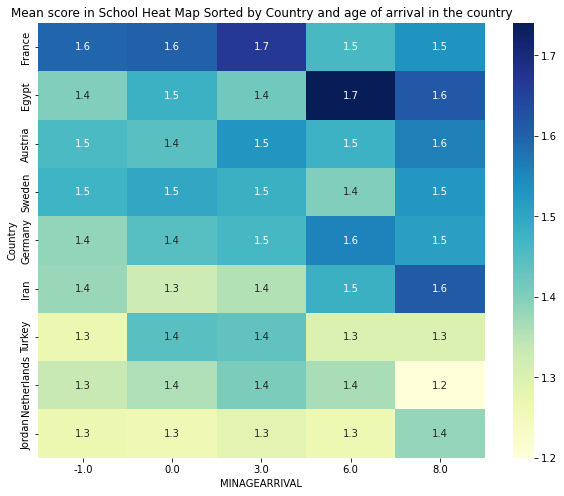

In [123]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(mean_scores_feelings, annot=True, cmap='YlGnBu')
plt.title('Mean score in School Heat Map Sorted by Country and age of arrival in the country')
plt.show()

We would expect students in Iran to feature at the bottom of 

# Experience in School

### Experience in School Columns

During this year, how often have other students from your school done any of the following things to you, including through texting or the internet?


A: Made fun of me or called me names\
B: Left me out of their games or activities\
C: Spread lies about me\
D: Stole something from me\
E: Damaged something of mine on purpose\
F: Hit or hurt me (e.g., shoving, hitting, kicking)\
G: Made me do things I didn’t want to do\
H: Sent me nasty or hurtful messages online\
I: Shared nasty or hurtful information about me online\ 
J: Threatened me


1 = At least once a week\
2 = Once or twice a month\
3 = A few times a year\
4 = Never

## Experience in School Heatmap

In [124]:
df_experience = df[main_variables+experiences_in_school_columns]

In [125]:
pivot_experience = df_experience.pivot_table(values=experiences_in_school_columns, index=main_variables, aggfunc='mean')

In [126]:
# Calculate the total average for each row
pivot_experience['MeanTotal'] = pivot_experience[experiences_in_school_columns].mean(axis=1)

In [127]:
sorted_pivot_experience = sort_pivot_table(pivot_experience, 'MeanTotal', 'ASBH02A', asbh02a_sorter)

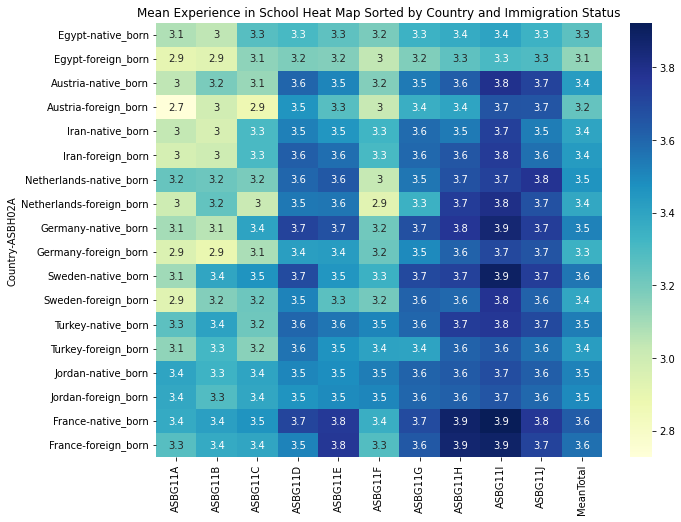

In [128]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_experience, annot=True, cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

The below is the order for *all* students - it is different for foreign and native-born students. 

|**Feelings**  | **Experience**|
|------------- |----------------|
|1. Jordan     |1. France       |
|2. Turkey     |2. Jordan       |
|3. Netherlands|3. Turkey       |
|4. Iran       |4. Sweden.      |
|5. Germany    |5. Germany.     |
|6. Egypt      |6. Netherlands. |
|7. Sweden     |7. Iran.        |
|8. Austria    |8. Austria      |
|9. France     |9. Egypt.       |

### I need to rearrange this so that dark colours (good are at the top).

Native born kids are having less negativ experiences in school as we would expect. Egypt is the worst, followed by Austria. These statistics are quite heartening overall, with most cohorts answering never or a few times a year for negative experiences. 

During this year, how often have other students from your school done any of the following things to you, including through texting or the internet?


A: Made fun of me or called me names\
B: Left me out of their games or activities\
C: Spread lies about me\
D: Stole something from me\
E: Damaged something of mine on purpose\
F: Hit or hurt me (e.g., shoving, hitting, kicking)\
G: Made me do things I didn’t want to do\
H: Sent me nasty or hurtful messages online\
I: Shared nasty or hurtful information about me online\ 
J: Threatened me\


1 = At least once a week\
2 = Once or twice a month\
3 = A few times a year\
4 = Never

Surprisingly, Iranian students report the least negative experiences in school of all countries. 

## Experience Average Distribution

In [129]:
df['experienceavg'] = df[experiences_in_school_columns].mean(axis=1)

In [ ]:
df['experienceavg_binned'] = pd.cut(df['experienceavg'], bins=10)

In [ ]:
# Create a contingency table
contingency_experience = (
    pd.crosstab(
        index=[df['ASBH02A'], df['Country']],
        columns=df['experienceavg_binned']
    )
    .reset_index()
    .melt(
        id_vars=['ASBH02A', 'Country'],
        var_name='experienceavg_binned',
        value_name='count'
    )
)

In [ ]:
heatmap_experience_native_born = generate_heatmap(
    data=contingency_experience,
    filter_column='ASBH02A',
    filter_value='native_born',
    index_col='Country',
    column_col='experienceavg_binned',
    value_col='count',
)

heatmap_experience_foreign_born = generate_heatmap(
    data=contingency_experience,
    filter_column='ASBH02A',
    filter_value='foreign_born',
    index_col='Country',
    column_col='experienceavg_binned',
    value_col='count',
)

#### Plotting

In [ ]:
# Create a figure and set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmaps
sns.heatmap(heatmap_experience_native_born, ax=axes[0], cmap='YlOrRd', annot=True, cbar=False)
sns.heatmap(heatmap_experience_foreign_born, ax=axes[1], cmap='YlOrRd', annot= True, cbar=False)

# Set titles
axes[0].set_title('Born in country')
axes[1].set_title('Not born in country')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
diff_data_experience = heatmap_experience_native_born - heatmap_experience_foreign_born

# Plot the difference heatmap
sns.heatmap(diff_data_experience, cmap="coolwarm", annot = True, center=0)

## Minimum age of arrival

Now I want to see how age of arrival affects average score. I need to first clean the minagearrival column - adding 'NA' for those who were born in country

In [130]:
pivot_minage_experience = df.pivot_table(values='experienceavg', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [131]:
mean_scores_test = (
        pivot_minage_experience.groupby(level='Country').mean()
        .assign(MeanTotal=lambda df: df.mean(axis=1))
        .sort_values(by='MeanTotal', ascending=False).drop(columns='MeanTotal')
    )

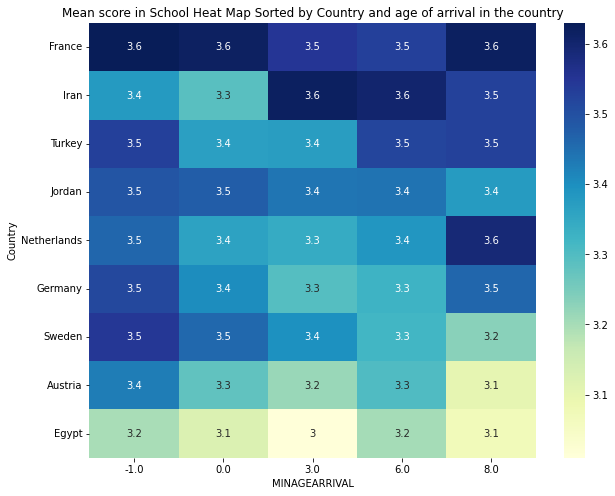

In [132]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(mean_scores_test, annot=True, cmap='YlGnBu')
plt.title('Mean score in School Heat Map Sorted by Country and age of arrival in the country')
plt.show()

# Further Research

comparisons with bench marks - through line? 

Should compare reading scores with the benchmark and can also compare with previous years.

**Comparison with data from previous years**

How other demographic factors - parents level of education etc. affect scores.